In [1]:
# from google.colab import files
# files.upload()
from google.colab import drive
drive.mount('/gdrive')
drive.mount('/content/drive')
import shutil
shutil.copy('/content/drive/MyDrive/model1.h5','/content')
shutil.copy('/content/drive/MyDrive/textdata.txt','/content')
shutil.copy('/content/drive/MyDrive/en_US.twitter.txt','/content')

Mounted at /gdrive
Mounted at /content/drive


'/content/en_US.twitter.txt'

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import random
import numpy as np 
import pickle

In [25]:
tokenizer = Tokenizer()

In [26]:
with open("en_US.twitter.txt", "r",encoding="utf-8") as f:
   data1= f.read()

In [27]:
with open("textdata.txt", "r") as f1:
    data2 = f1.read()

In [28]:
def split_to_sentences(data):
    """
    Split data by linebreak "\n"
    Args:
        data: str
    Returns:
        A list of sentences
    """
    sentences = data.lower().split("\n")
    sentences = [s.strip() for s in sentences]
    sentences = [s for s in sentences if len(s) > 0]
    return sentences   
def split_to_sentences1(data):
    """
    Split data by "." "\n"
    Args:
        data: str
    Returns:
        A list of sentences
    """
    sentences = data.lower().split(".")
    sentences=[s+"." for s in sentences]
    sentences = [s.strip() for s in sentences]
    sentences = [s for s in sentences if len(s) > 0]
    return sentences

In [29]:
process_data_list1 = split_to_sentences1(data1)
process_data_list2= split_to_sentences1(data2)
process_data_list=process_data_list1+process_data_list2
random.seed(101)
random.shuffle(process_data_list)

In [30]:
print(len(process_data_list))

469771


In [31]:
fin_data=process_data_list1[:int(len(process_data_list1)*0.05)]

In [32]:
tokenizer.fit_on_texts(fin_data)
total_words = len(tokenizer.word_index) + 1
print(total_words)

6362


In [11]:
input_sequences = []
for line in fin_data:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [12]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [37]:
max_sequence_len

131

In [13]:
print(input_sequences.shape)

(28680, 131)


In [14]:
model = Sequential()
model.add(Embedding(total_words, 400, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(170, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 400)          2544800   
_________________________________________________________________
bidirectional (Bidirectional (None, 130, 340)          776560    
_________________________________________________________________
dropout (Dropout)            (None, 130, 340)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               240128    
_________________________________________________________________
dense (Dense)                (None, 3181)              410349    
_________________________________________________________________
dense_1 (Dense)              (None, 6362)              20243884  
Total params: 24,215,721
Trainable params: 24,215,721
Non-trainable params: 0
____________________________________________

In [16]:
import tensorflow as tf

In [17]:
model=tf.keras.models.load_model('model1.h5')

In [36]:
history = model.fit(predictors, label, epochs=1)
model.save('model11.h5')
shutil.copy('/content/model11.h5','/content/drive/MyDrive')

897/897 [==============================] - 49s 55ms/step - loss: 1.5318 - accuracy: 0.7294


'/content/drive/MyDrive/model11.h5'

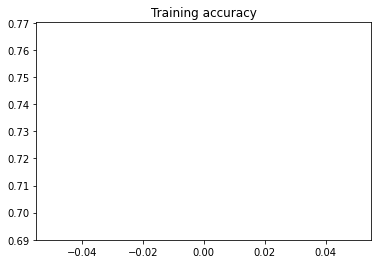

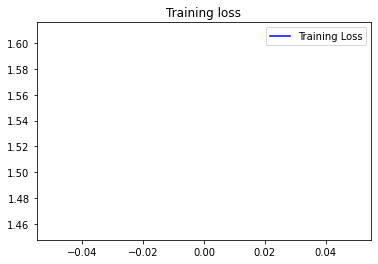

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

In [20]:
def recommendation(seed_text,n):

  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
#predicted = model.predict_classes(token_list, verbose=0)
  predicted=model.predict(token_list,verbose=3)[0]
  predicted_index=np.argsort(predicted)[-n:]
  predicted_index=list(predicted_index)
  predicted_index.reverse()
  output=[]
  for i in predicted_index:
    for w,ind in tokenizer.word_index.items():
      if ind==i:
        output.append(w)
        break
  print(output)

In [23]:
text="How are"
n=5
recommendation(text,n)

['you', 'a', 'that', 'i', 'yu']


In [ ]:
model.save('model1.h5')
shutil.copy('/content/model1.h5','/content/drive/MyDrive')

'/content/drive/MyDrive/model1.h5'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounted at /gdrive


In [ ]:
#copy from colab to drive
shutil.copy('/content/model11.h5','/content/drive/MyDrive')

'/content/drive/MyDrive/model11.h5'

In [ ]:
#copy from drive to colab


'/content/model11.h5'

In [ ]:
shutil.copy('/content/textdata.txt','/content/drive/MyDrive')


'/content/drive/MyDrive/textdata.txt'

In [ ]:
shutil.copy('/content/drive/MyDrive/textdata.txt','/content')

'/content/textdata.txt'

In [ ]:
shutil.copy('/content/en_US.twitter.txt','/content/drive/MyDrive')

'/content/drive/MyDrive/en_US.twitter.txt'

In [35]:
import pickle
pickle.dump(tokenizer, open("tokenizer.pkl", "wb"))

In [ ]:

model = pickle.load(open("autocomplete.pkl", "rb"))
tokenizer=pickle.load(open("cv.pkl", "rb"))